## Loading Data

---



In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [10]:
!cp '/content/gdrive/MyDrive/Machine Learning/archive.zip' /content/

In [11]:
!cd /content/
!unzip archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/JULIA/042.jpg     
  inflating: train/JULIA/043.jpg     
  inflating: train/JULIA/044.jpg     
  inflating: train/JULIA/045.jpg     
  inflating: train/JULIA/046.jpg     
  inflating: train/JULIA/047.jpg     
  inflating: train/JULIA/048.jpg     
  inflating: train/JULIA/049.jpg     
  inflating: train/JULIA/050.jpg     
  inflating: train/JULIA/051.jpg     
  inflating: train/JULIA/052.jpg     
  inflating: train/JULIA/053.jpg     
  inflating: train/JULIA/054.jpg     
  inflating: train/JULIA/055.jpg     
  inflating: train/JULIA/056.jpg     
  inflating: train/JULIA/057.jpg     
  inflating: train/JULIA/058.jpg     
  inflating: train/JULIA/059.jpg     
  inflating: train/JULIA/060.jpg     
  inflating: train/JULIA/061.jpg     
  inflating: train/JULIA/062.jpg     
  inflating: train/JULIA/063.jpg     
  inflating: train/JULIA/064.jpg     
  inflating: train/JULIA/065.jpg     
  inflating: train/JULIA/066.jpg     

## Main Code

---



In [12]:
import numpy as np
import pandas as pd
import os

In [13]:
from sklearn.utils import shuffle
import tensorflow as tf

from tensorflow.keras.utils import image_dataset_from_directory

In [14]:
import matplotlib.pyplot as plt


def plot_metric(hist, metric):
    plt.plot(hist.history[f"{metric}"], label=f"{metric}")
    plt.plot(hist.history[f"val_{metric}"], label=f"val_{metric}")
    plt.title(f"{metric} Function Evolution")
    plt.legend()


def plot_hist(hist):
    plt.figure(figsize=(12, 8))
    plt.subplot(1, 2, 1)
    plot_metric(hist, 'loss')

    plt.subplot(1, 2, 2)
    plot_metric(hist, 'accuracy')

In [15]:
butterfly_path = '/content/'

In [16]:
train_ds = image_dataset_from_directory(butterfly_path + 'train')


Found 9285 files belonging to 75 classes.


In [17]:
valid_ds = image_dataset_from_directory(butterfly_path + 'valid')


Found 375 files belonging to 75 classes.


In [18]:
test_ds = image_dataset_from_directory(butterfly_path + 'test', shuffle=False)  # when shuffle is True, it auto shuffles on each iteration


Found 375 files belonging to 75 classes.


In [19]:
class_names = train_ds.class_names
class_count = len(class_names)
print(class_names)

['ADONIS', 'AFRICAN GIANT SWALLOWTAIL', 'AMERICAN SNOOT', 'AN 88', 'APPOLLO', 'ATALA', 'BANDED ORANGE HELICONIAN', 'BANDED PEACOCK', 'BECKERS WHITE', 'BLACK HAIRSTREAK', 'BLUE MORPHO', 'BLUE SPOTTED CROW', 'BROWN SIPROETA', 'CABBAGE WHITE', 'CAIRNS BIRDWING', 'CHECQUERED SKIPPER', 'CHESTNUT', 'CLEOPATRA', 'CLODIUS PARNASSIAN', 'CLOUDED SULPHUR', 'COMMON BANDED AWL', 'COMMON WOOD-NYMPH', 'COPPER TAIL', 'CRECENT', 'CRIMSON PATCH', 'DANAID EGGFLY', 'EASTERN COMA', 'EASTERN DAPPLE WHITE', 'EASTERN PINE ELFIN', 'ELBOWED PIERROT', 'GOLD BANDED', 'GREAT EGGFLY', 'GREAT JAY', 'GREEN CELLED CATTLEHEART', 'GREY HAIRSTREAK', 'INDRA SWALLOW', 'IPHICLUS SISTER', 'JULIA', 'LARGE MARBLE', 'MALACHITE', 'MANGROVE SKIPPER', 'MESTRA', 'METALMARK', 'MILBERTS TORTOISESHELL', 'MONARCH', 'MOURNING CLOAK', 'ORANGE OAKLEAF', 'ORANGE TIP', 'ORCHARD SWALLOW', 'PAINTED LADY', 'PAPER KITE', 'PEACOCK', 'PINE WHITE', 'PIPEVINE SWALLOW', 'POPINJAY', 'PURPLE HAIRSTREAK', 'PURPLISH COPPER', 'QUESTION MARK', 'RED ADMIRA

In [20]:
IMG_SIZE = 224
size = (IMG_SIZE, IMG_SIZE)
train_ds = train_ds.map(lambda image, label:
                        (tf.image.resize(image, size), label))
valid_ds = valid_ds.map(lambda image, label:
                        (tf.image.resize(image, size), label))
test_ds = test_ds.map(lambda image, label:
                      (tf.image.resize(image, size), label))


In [24]:
base_model = tf.keras.applications.efficientnet.EfficientNetB0(
    include_top=False,
    weights=None,
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    pooling='max')
base_model.trainable = True
x = base_model.output
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(rate=.2)(x)
output = tf.keras.layers.Dense(class_count, activation='softmax')(x)
model = tf.keras.models.Model(inputs=base_model.input, outputs=output)
model.compile(tf.keras.optimizers.Adam(learning_rate=.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


Epoch 1/30
291/291 [==============================] - 189s 580ms/step - loss: 4.4058 - accuracy: 0.0449 - val_loss: 5.0334 - val_accuracy: 0.0133
Epoch 2/30
291/291 [==============================] - 165s 564ms/step - loss: 3.2287 - accuracy: 0.1833 - val_loss: 3.2438 - val_accuracy: 0.2453
Epoch 3/30
291/291 [==============================] - 165s 566ms/step - loss: 2.4470 - accuracy: 0.3418 - val_loss: 1.9243 - val_accuracy: 0.5013
Epoch 4/30
291/291 [==============================] - 165s 567ms/step - loss: 1.9344 - accuracy: 0.4702 - val_loss: 1.4309 - val_accuracy: 0.6133
Epoch 5/30
291/291 [==============================] - 166s 567ms/step - loss: 1.6745 - accuracy: 0.5357 - val_loss: 1.7186 - val_accuracy: 0.4987
Epoch 6/30
291/291 [==============================] - 165s 567ms/step - loss: 1.4688 - accuracy: 0.5912 - val_loss: 1.4367 - val_accuracy: 0.5920
Epoch 7/30
291/291 [==============================] - 166s 568ms/step - loss: 1.2945 - accuracy: 0.6360 - val_loss: 1.9012 -

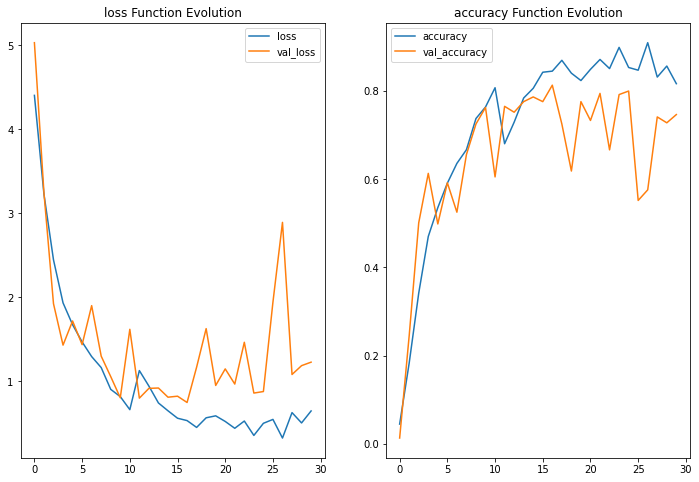

In [25]:
hist = model.fit(train_ds, validation_data=valid_ds, epochs=30)
plot_hist(hist)

In [26]:
!cd '/content'
!pwd

/content


In [27]:
model.save('efficient_b0_30_epochs_scratch')

INFO:tensorflow:Assets written to: efficient_b0_30_epochs_scratch/assets


In [28]:
!cp -r '/content/efficient_b0_30_epochs_scratch' '/content/gdrive/MyDrive/Machine Learning'

In [29]:
model.save('efficient_b0_30_epochs_scratch.h5')

In [30]:
!cp '/content/efficient_b0_30_epochs_scratch.h5' '/content/gdrive/MyDrive/Machine Learning'

In [31]:
from sklearn.metrics import classification_report

y_pred = np.argmax(model.predict(test_ds, batch_size=5), axis=-1)
y_test = np.concatenate(
    [label for batch, label in test_ds.as_numpy_iterator()])
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      1.00      1.00         5
           2       0.75      0.60      0.67         5
           3       0.80      0.80      0.80         5
           4       0.83      1.00      0.91         5
           5       1.00      0.80      0.89         5
           6       1.00      1.00      1.00         5
           7       1.00      0.80      0.89         5
           8       0.20      0.40      0.27         5
           9       1.00      1.00      1.00         5
          10       0.75      0.60      0.67         5
          11       0.83      1.00      0.91         5
          12       1.00      0.80      0.89         5
          13       0.71      1.00      0.83         5
          14       0.80      0.80      0.80         5
          15       0.62      1.00      0.77         5
          16       1.00      0.60      0.75         5
          17       0.67    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
